In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import urllib
%matplotlib inline 
import scipy as sp
import numpy as np
import pandas as pd
import seaborn as sb
%load_ext autoreload
import math

In [2]:
%autoreload

In [3]:
dwayne_file = "autosaveDJO.graphml"

In [4]:
dwayne = nx.read_graphml(dwayne_file)

In [5]:
movies = [node for node, node_data in dwayne.nodes(data=True) if node_data['bipartite'] == 1]

In [6]:
movieProjection = nx.bipartite.weighted_projected_graph(dwayne,movies)
filtered = nx.Graph(movieProjection)
len(filtered)

2683

In [7]:
to_remove = []
for node, data in filtered.nodes(data=True):  
    if(math.isnan(data['gross']) or math.isnan(data['budget'])):
        to_remove.append(node)

In [9]:
for item in to_remove:
    filtered.remove_node(item)


In [11]:
len(filtered.nodes(data=True))
dwayne_gross = dict(nx.get_node_attributes(filtered, "gross"))
dwayne_budget = dict(nx.get_node_attributes(filtered, "budget"))
dwayne_names = dict(nx.get_node_attributes(filtered,"label"))

In [12]:
df = pd.DataFrame({"Name":dwayne_names, "Gross": dwayne_gross, "Budget":dwayne_budget})


Text(0.5,1,'Log-log budget v ratio in DJO movies')

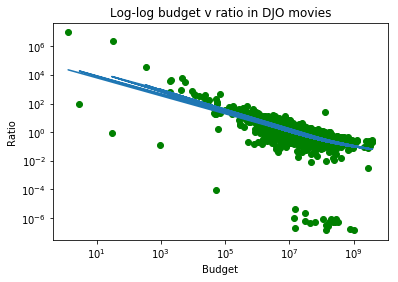

In [14]:
GB = df['Gross']/df['Budget']
df['ratio'] = GB
df.head()

b = df['Budget']
r = df['ratio']

plt.loglog(df['Budget'],df['ratio'], 'og')
#plt.ylim(0,30)
plt.ylabel('Ratio')
plt.xlabel('Budget')

logx = np.log(b)
logy = np.log(r)
coeffs = np.polyfit(logx, logy, deg=3)
poly = np.poly1d(coeffs)
yfit = lambda x:np.exp(poly(np.log(x)))
plt.loglog(b,yfit(b))
plt.title("Log-log budget v ratio in DJO movies")

In [15]:
max(df['ratio'])

9230769.23076923

Text(0.5,1,'Profit Ratio Heatmap of DJO')

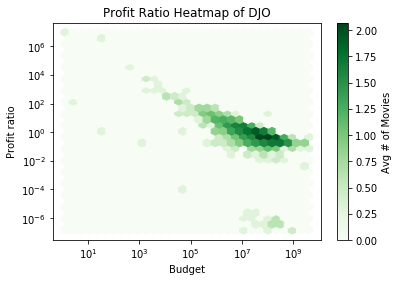

In [17]:
from matplotlib import cm as CM

plt.hexbin(df['Budget'],df['ratio'], bins = 'log', yscale= 'log', xscale = 'log', cmap=CM.Greens, gridsize = 30)
#plt.axis([df['Budget'].min(),df['Budget'].max(),df['ratio'].min(),df['ratio'].max() ])
cb = plt.colorbar()
cb.set_label("Avg # of Movies")
plt.ylabel('Profit ratio')
plt.xlabel('Budget')
plt.title("Profit Ratio Heatmap of DJO")

